In [7]:
import torch
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [8]:
model = torch.hub.load('../yolov5',
                       'custom', path='../yolov5/runs/train/exp/weights/best.pt',
                       source='local', device='cuda:0')

YOLOv5 🚀 v7.0-253-g63555c8 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11177MiB)

Fusing layers... 
Model summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [9]:
# Image
im = '../datasets/Merged_frontalOnly/images/val/AabparaChowk-day-1-1452.jpg'

In [10]:
results = model(im, size=640)

In [11]:
df = results.pandas().xyxy[0]
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,369.543976,247.933258,537.030884,404.621796,0.905237,4,van
1,385.156128,177.801208,511.381470,269.547882,0.854144,4,van
2,599.341858,256.684448,686.939026,338.910095,0.850144,2,mini_car
3,965.538452,169.004135,1055.669678,226.975143,0.814866,3,sedan
4,481.699341,127.465607,535.352295,161.933777,0.686692,6,bike
5,951.181458,114.805573,988.631653,157.197968,0.491160,6,bike


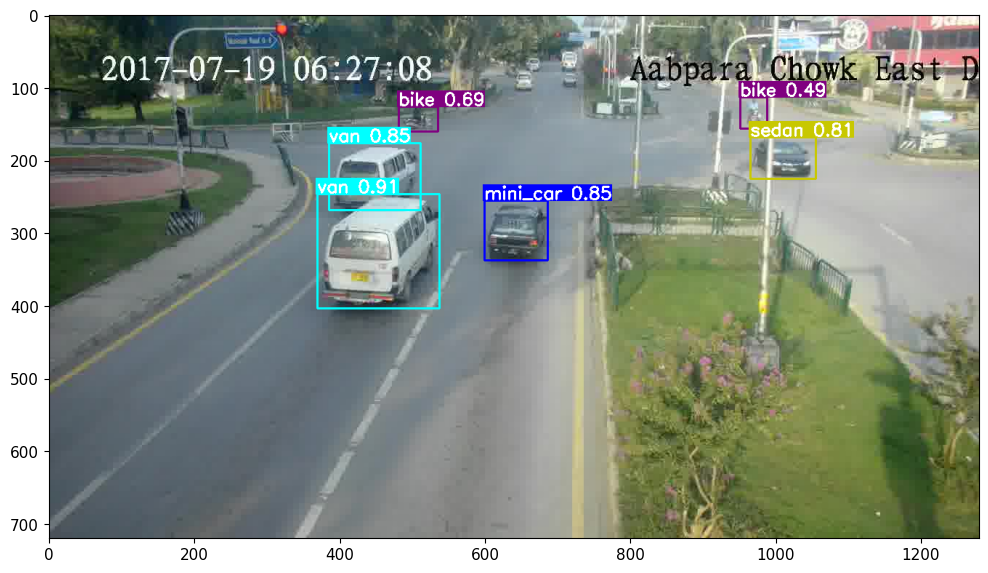

In [12]:
color_dict = {
    0: (255, 0, 0),    # Red
    1: (0, 255, 0),    # Green
    2: (0, 0, 255),    # Blue
    3: (200, 200, 0),  # Dark Yellow
    4: (0, 255, 255),  # Cyan
    5: (255, 0, 255),  # Magenta
    6: (128, 0, 128),  # Purple
    7: (255, 165, 0)   # Orange
}

image = cv2.imread(im)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for ind in df.index:
    xmin = int(df['xmin'][ind])
    ymin = int(df['ymin'][ind])
    xmax = int(df['xmax'][ind])
    ymax = int(df['ymax'][ind])
    classNo = int(df['class'][ind])

    # bounding box
    img = cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), color_dict[classNo], 2)

for ind in df.index:
    xmin = int(df['xmin'][ind])
    ymin = int(df['ymin'][ind])
    xmax = int(df['xmax'][ind])
    ymax = int(df['ymax'][ind])
    confidence = df['confidence'][ind]
    classNo = int(df['class'][ind])
    name = df['name'][ind]

    # text size and width
    (text_width, text_height) = cv2.getTextSize(f'{name} {confidence:.2f}', cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0]

    # putting background
    cv2.rectangle(image_rgb, (xmin-2,ymin), (xmin+text_width-2, ymin-text_height-4), color_dict[classNo], cv2.FILLED)
    
    # object name
    cv2.putText(image_rgb, f'{name} {confidence:.2f}', (xmin, ymin-2), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

plt.figure(figsize=(12,12))
plt.imshow(image_rgb)
plt.show()
    

image 1/1: 720x1280 1 mini_car, 1 sedan, 2 vans, 2 bikes
Speed: 12.9ms pre-process, 12.3ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


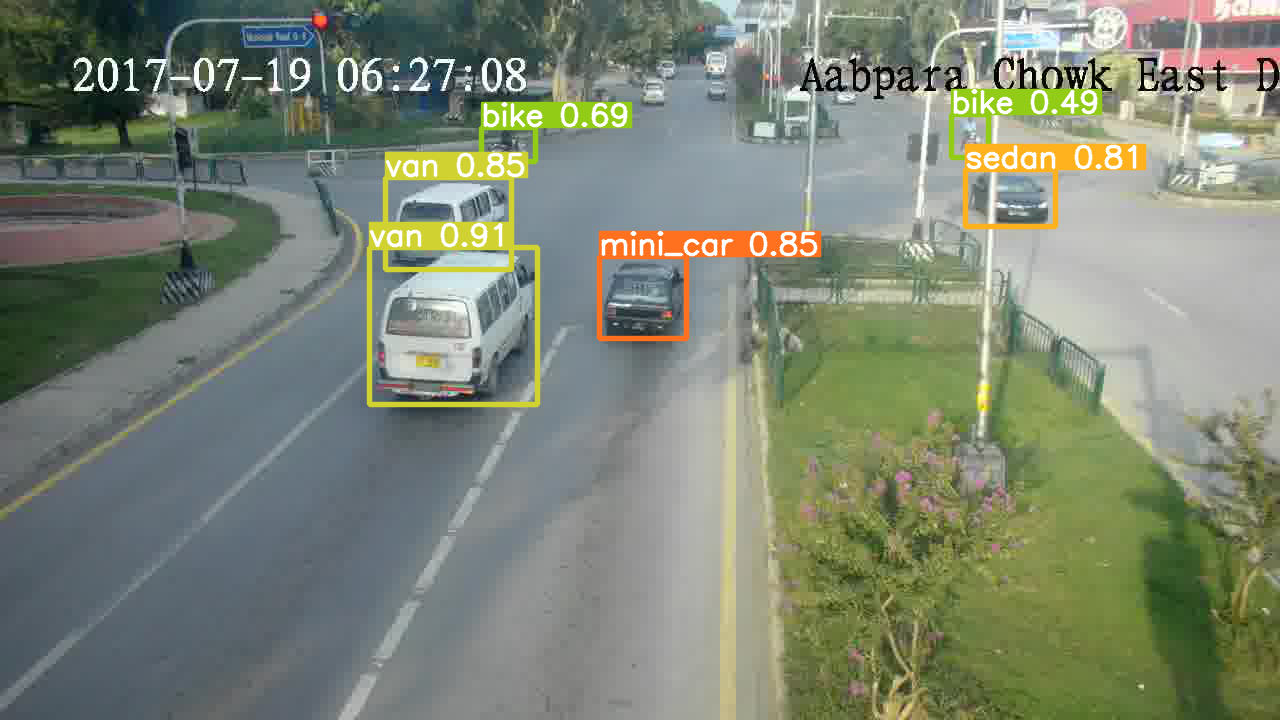

In [13]:
results.print()
results.show()